In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import itertools
# %matplotlib notebook

In [2]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

$$
f(x)=\frac{1}{2} x^{\mathrm{T}} A x-b^{\mathrm{T}} x+c
$$

$$
\begin{array}{c}f^{\prime}(x)=A x-b \\ A x-b=0\end{array}
$$

In [3]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

In [4]:
def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#     fig.show()
    return x1, x2, zs

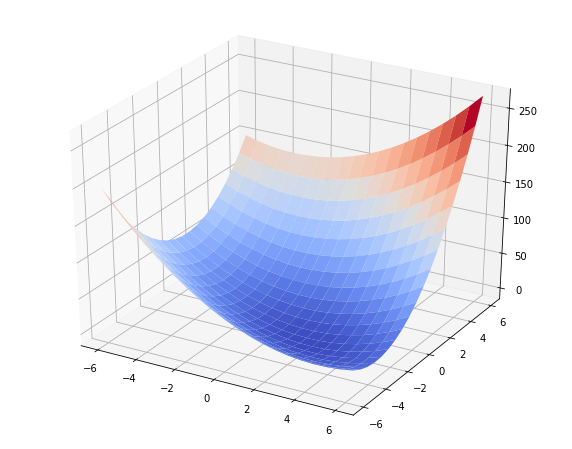

In [5]:
x1, x2, zs = bowl(A, b, c)

In [6]:
def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
#     fig.show()

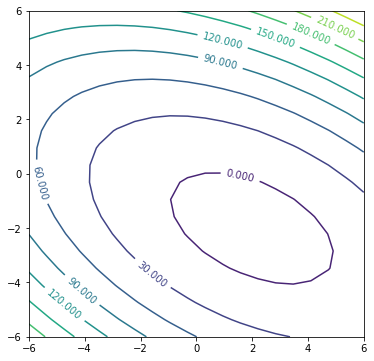

In [7]:
contoursteps(x1, x2, zs)

## The Conjugate Directions

The $A$-orthogonal vectors, where $A$ is the matrix with coefficients from the orignal equation $Ax = b$. 

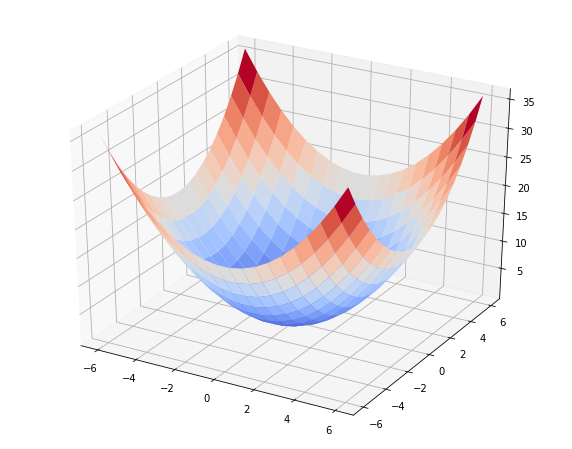

In [8]:
Around = np.matrix([[1, 0],[0, 1]])
bround = np.matrix([[0],[0]])
cround = 0
x1, x2, zs = bowl(Around, bround, cround)

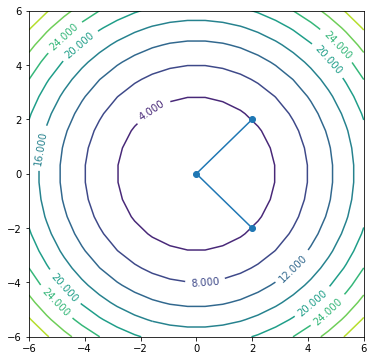

In [9]:
va = np.matrix([[2],[2]])
vb = np.matrix([[2],[-2]])
contoursteps(x1, x2, zs, [(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

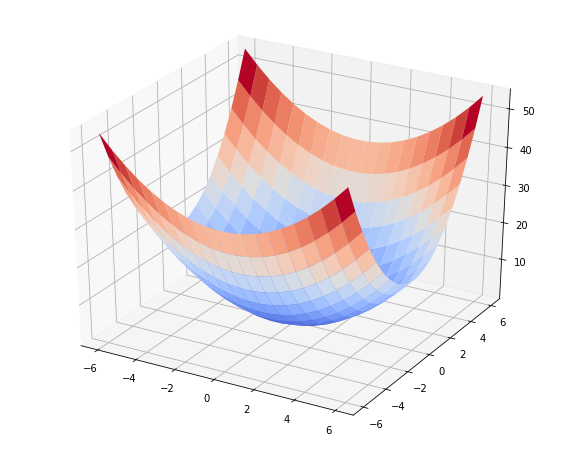

In [10]:
Ascaled = np.matrix([[1, 0],[0, 2]])
bscaled = np.matrix([[0],[0]])
cscaled = 0
x1, x2, zs = bowl(Ascaled, bscaled, cscaled)

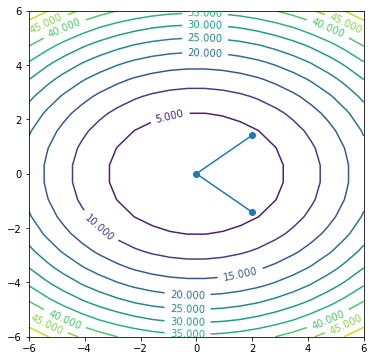

In [11]:
va = np.matrix([[2],[np.sqrt(2)]])
vb = np.matrix([[2],[-np.sqrt(2)]])
contoursteps(x1, x2, zs, [(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])
# plt.savefig('a-orthogonal-example.pdf')

Vectors are not orthogonal but $A$-orthogonal.

In [12]:
float(va.T * vb)

1.9999999999999996

In [13]:
float(va.T * Ascaled * vb)

-8.881784197001252e-16

Vectors $a$ and $b$ are $A$-orthogonal or conjugate iff
$$
a^{\mathrm{T}} A b=0
$$

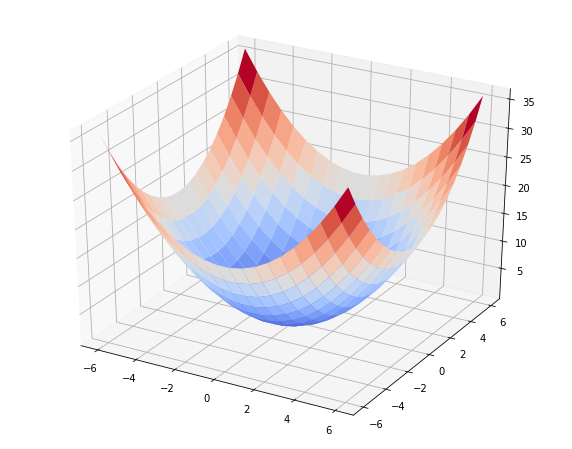

In [14]:
Around = np.matrix([[1, 0],[0, 1]])
bround = np.matrix([[0],[0]])
cround = 0
x1, x2, zs = bowl(Around, bround, cround)

In [15]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = bround - np.matrix([[1, 0],[0, 0]]) * x  # replaced Around with this to force residual to be parallel to X axis
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (Around * r)))
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = bround - Around * x
    delta = r.T * r
    i += 1

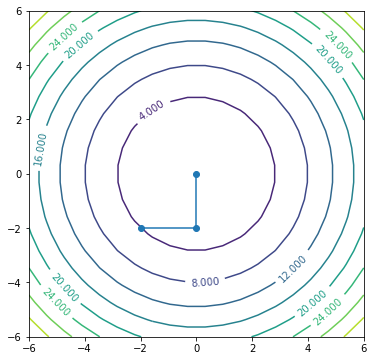

In [16]:
contoursteps(x1, x2, zs, steps)

## The Conjugate Gradients Method

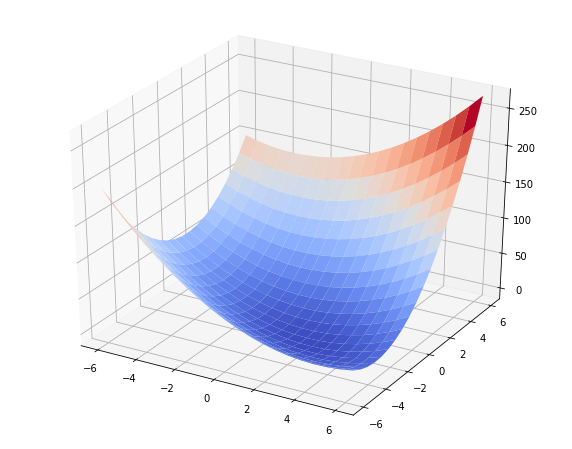

In [17]:
x1, x2, zs = bowl(A, b, c)

In [18]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
d = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    x = x + alpha * d
    steps.append((x[0, 0], x[1, 0]))
    r = b - A * x
    deltaold = deltanew
    deltanew = r.T * r
    #beta = -float((r.T * A * d) / float(d.T * A * d))
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1

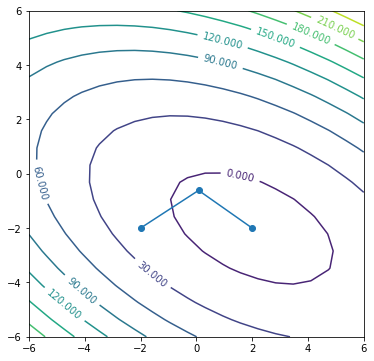

In [19]:
contoursteps(x1, x2, zs, steps)
# plt.savefig('conjugate-gradient.pdf')

In [20]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
d = r
deltanew = r.T * r
delta0 = deltanew

In [21]:
alpha = float(deltanew / float(d.T * (A * d)))
x = x + alpha * d
steps.append((x[0, 0], x[1, 0]))

In [22]:
r = b - A * x

### Direction of the Steepest method

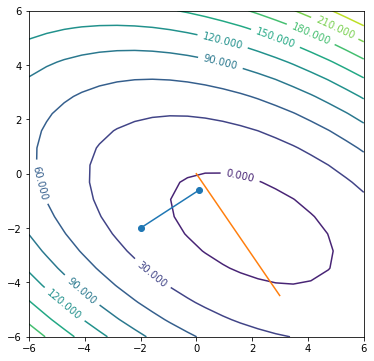

In [23]:
contoursteps(x1, x2, zs, [(-2, -2), (x[0,0],x[1,0])])
plt.plot([0, r[0, 0]], [0, r[1, 0]])
# plt.show()

In [24]:
d.T * A * r

matrix([[-167.25333333]])

In [25]:
deltaold = deltanew
deltanew = r.T * r
beta = float(deltanew / float(deltaold))

In [26]:
oldd = d  # this is needed for future demonstration, not relevant to the algorithm
d = r + beta * d

### Direction of the Conjugate gradient method

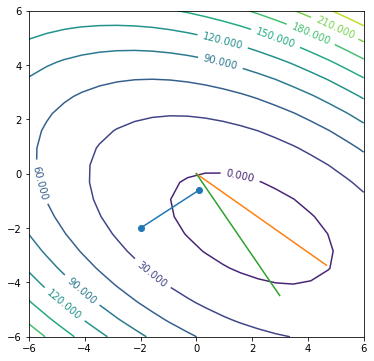

In [27]:
contoursteps(x1, x2, zs, [(-2, -2), (x[0,0],x[1,0])])
plt.plot([0,d[0,0]], [0, d[1,0]])  # new direction
plt.plot([0,r[0,0]], [0, r[1,0]])  # old direction (residual)
plt.show()

In [28]:
oldd.T * A * d

matrix([[0.]])

In [29]:
i += 1

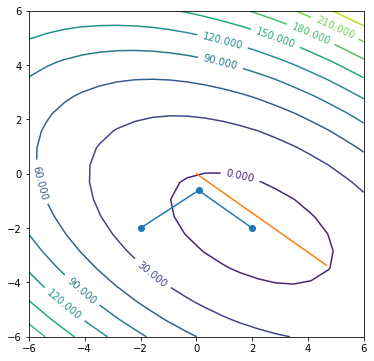

In [30]:
alpha = float(deltanew / float(d.T * (A * d)))
x = x + alpha * d
steps.append((x[0, 0], x[1, 0]))
contoursteps(x1, x2, zs, steps)
plt.plot([0,d[0,0]], [0, d[1,0]])
plt.show()